In [71]:
# loading the pandas for reading the dataframe.
import pandas as pd

# loading the numpy for math calculations.
import numpy as np

# loading the seaborn library for visualizations.
import seaborn as sns

# loading the matplotlib library for visualizations.
import matplotlib.pyplot as plt

# loading the housing data.
from sklearn.datasets import load_boston

In [72]:
# creating the dataset.
boston = load_boston()

print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [73]:
boston.DESCR

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

In [74]:

# creating the dataset with feature available.
df = pd.DataFrame(boston.data, columns = boston.feature_names)

# priting top 5 rows.
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [75]:
df['MEDV']  = boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.4 KB


In [77]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

lets see the distribution of MEDV target variable.

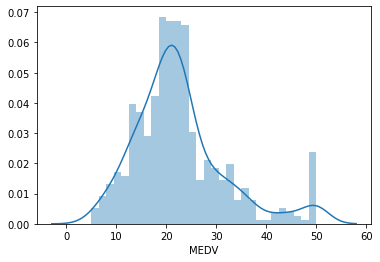

In [78]:
sns.distplot(df['MEDV'], bins = 30)
plt.show()


the 'MEDV' data is distributed normally with outliers. 

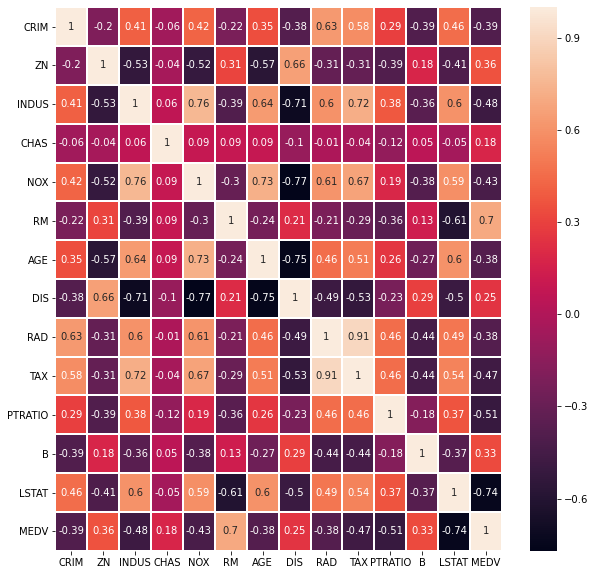

In [79]:
fig,ax = plt.subplots(figsize=(10,10))
corr = df.corr().round(2)
sns.heatmap(corr, annot = True, linewidths = 1, ax=ax)

The above fig is of correlation matrix which measures the linear relationships between the variables.
The correlation coefficient ranges from -1 to 1. if the value is close to 1, it means that there is strong positive correlation 
between two variables. When it is close to -1 then there is strong negative correlation between two variables.
To fit the linear regression model, we select only those model which have a high correlation with the 'MEDV'.
By looking at the correlation matrix we can see that 'RM' has strong positive correlation 70% with 'MEDV' 
and 'LSTAT' has the high negative correlation with 'MEDV'.
The variable 'RAD' and 'TAX' have correlation of 0.91, those are highly correlated to eachother.
So we are not taking these variables together in model. Same is for 'DIS' and 'AGE'.

In [98]:
# Preaparing the training data for the model.
x = pd.DataFrame(df[['LSTAT','RM']], columns = ['LSTAT','RM'])
print(x.head())

y = df['MEDV']
print(y.head())

   LSTAT     RM
0   4.98  6.575
1   9.14  6.421
2   4.03  7.185
3   2.94  6.998
4   5.33  7.147
0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64


In [99]:
# import library for splitting the data.
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,train_size = 0.7, test_size = 0.3,random_state = 5)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(354, 2)
(152, 2)
(354,)
(152,)


In [100]:
# we are using sklearn's linear regression to build the model.
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [101]:
# model evaluation for training set.
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

y_train_predict = model.predict(x_train)
rmse = (np.sqrt(mean_squared_error(y_train,y_train_predict)))
r2 = r2_score(y_train,y_train_predict)

print("performance of Training set")
print("RMSE is {}".format(rmse))
print("r2_score is {}".format(r2))
print("\n")


# model evaluation for testing data.
y_test_predict = model.predict(x_test)
rmse = (np.sqrt(mean_squared_error(y_test,y_test_predict)))
r2   = r2_score(y_test,y_test_predict)
print("performance of test dataset")
print("RMSE is {}". format(rmse))
print("r2_score is {}". format(r2))

performance of Training set
RMSE is 5.291267334085863
r2_score is 0.6493177656003104


performance of test dataset
RMSE is 6.041044703455955
r2_score is 0.6162026947666572


In [104]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_predict})
df1.head()

,Actual,Predicted
226,37.6,37.168980
292,27.9,29.320354
90,22.6,25.580271
373,13.8,1.156466
273,35.2,33.207071


Text(0, 0.5, 'y_pred')

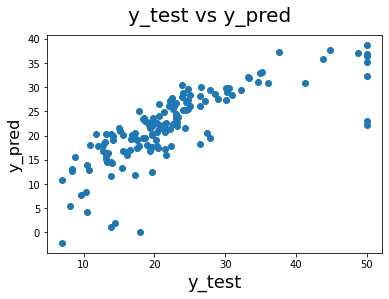

In [109]:

fig = plt.figure()
plt.scatter(y_test,y_test_predict)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [118]:
# len(y_test)
# c = [i for i in range(1,153,1)]
# c

Text(0, 0.5, 'Boston Data')

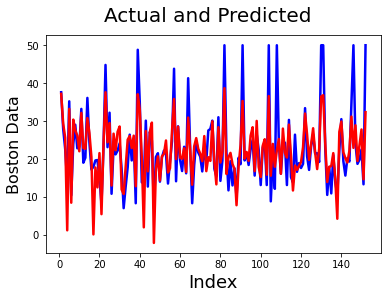

In [117]:
# Actual vs Predicted
c = [i for i in range(1,153,1)]
fig = plt.figure()
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")     #Plotting Actual
plt.plot(c,y_test_predict, color="red",  linewidth=2.5, linestyle="-")  #Plotting predicted
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Boston Data', fontsize=16)                       # Y-label